In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stc

In [8]:
streaming_music = pd.read_json("./Spotify Account Data/StreamingHistory_music_0.json")
streaming_podcast = pd.read_json("./Spotify Account Data/StreamingHistory_podcast_0.json")
playlist = pd.read_json("./Spotify Account Data/Playlist1.json")
search_query = pd.read_json("./Spotify Account Data/SearchQueries.json")


In [6]:
streaming_music.head()

,endTime,artistName,trackName,msPlayed
0,2022-09-07 11:49,Taylor Swift,Don’t Blame Me,7080
1,2023-02-02 20:31,Imagine Dragons,Demons,17456
2,2023-02-03 18:19,Lorde,The Louvre,88278
3,2023-02-03 18:19,Taylor Swift,Style,563
4,2023-02-03 18:21,Harry Styles,As It Was,160466


In [21]:
streaming_music["endTime"] = pd.to_datetime(streaming_music["endTime"])

In [14]:
# my_library = pd.read_json("C:/Users/Somu/Desktop/PythonEDA/Spotify Account Data/YourLibrary.json")

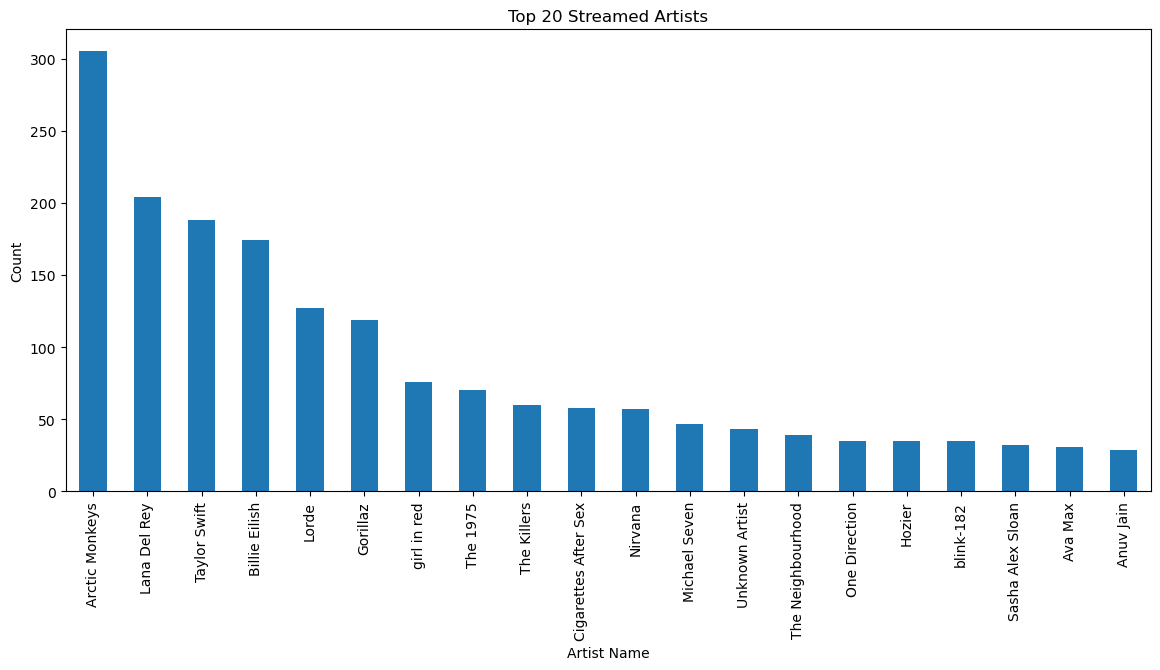

In [58]:
# Top 20 Artists

top_artists = streaming_music["artistName"].value_counts().head(20)

plt.figure(figsize= (14,6))
top_artists.plot(kind = "bar")
plt.xlabel("Artist Name")
plt.ylabel("Count")
plt.title("Top 20 Streamed Artists")
plt.show()

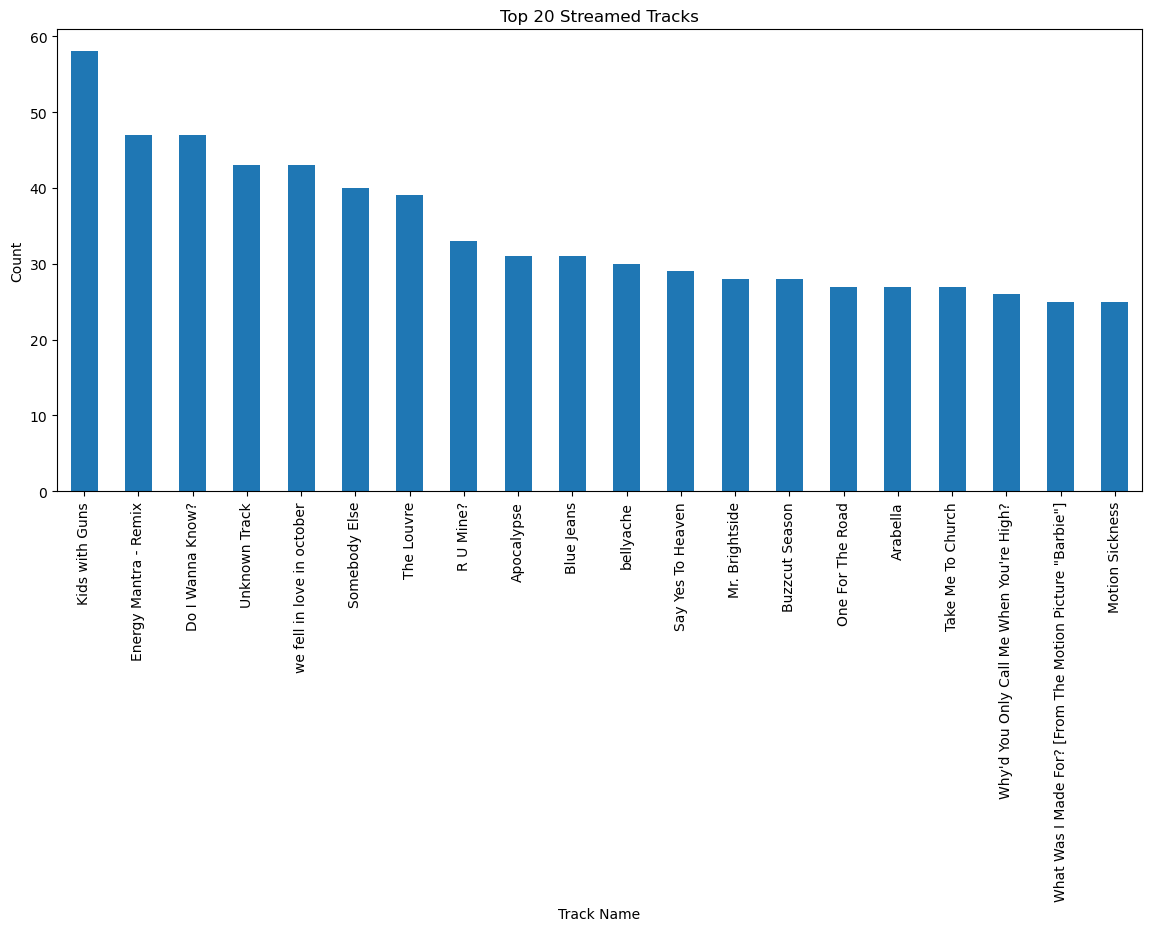

In [57]:
top_tracks = streaming_music["trackName"].value_counts().head(20)

plt.figure(figsize= (14,6))
top_tracks.plot(kind = "bar")
plt.xlabel("Track Name")
plt.ylabel("Count")
plt.title("Top 20 Streamed Tracks")
plt.show()

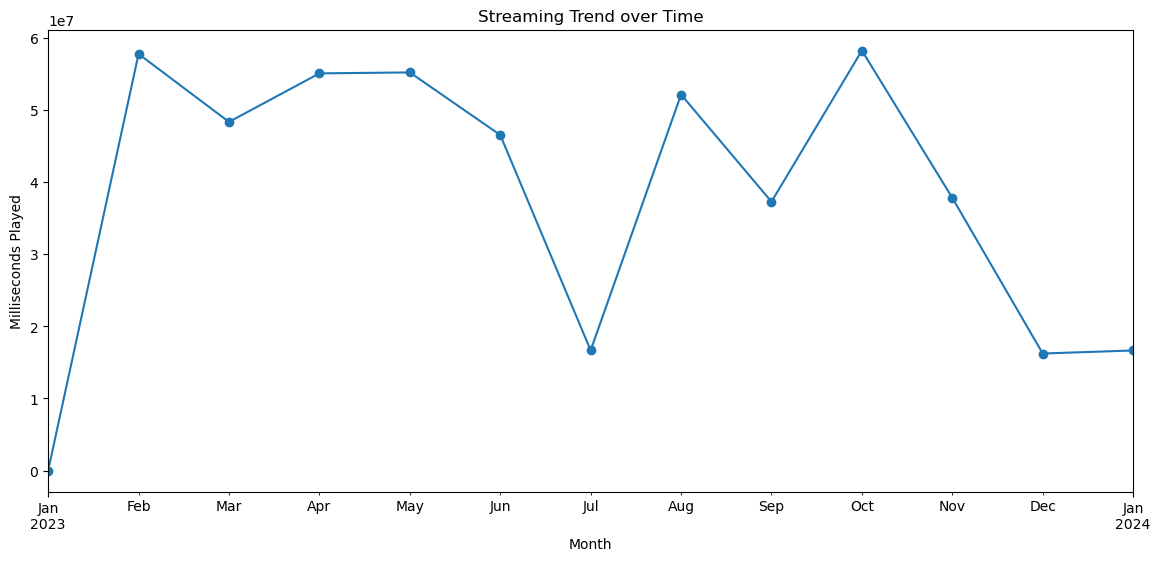

In [56]:
# streaming_music.set_index("endTime", inplace = True)

plt.figure(figsize= (14,6))
monthly_stream = streaming_music.resample('M')['msPlayed'].sum()
monthly_stream[4:].plot(marker = 'o')
plt.xlabel("Month")
plt.ylabel("Milliseconds Played")
plt.title("Streaming Trend over Time")
plt.show()

In [71]:
streamed_mins = round(streaming_music["msPlayed"].sum()/(1000*60))

print(f"A total {streamed_mins} minutes of streaming")

A total 8297 minutes of Streaming


In [77]:
total_artists = streaming_music["artistName"].drop_duplicates().count()

print(f"Listened to {total_artists} artists")

Listened to 547 artists


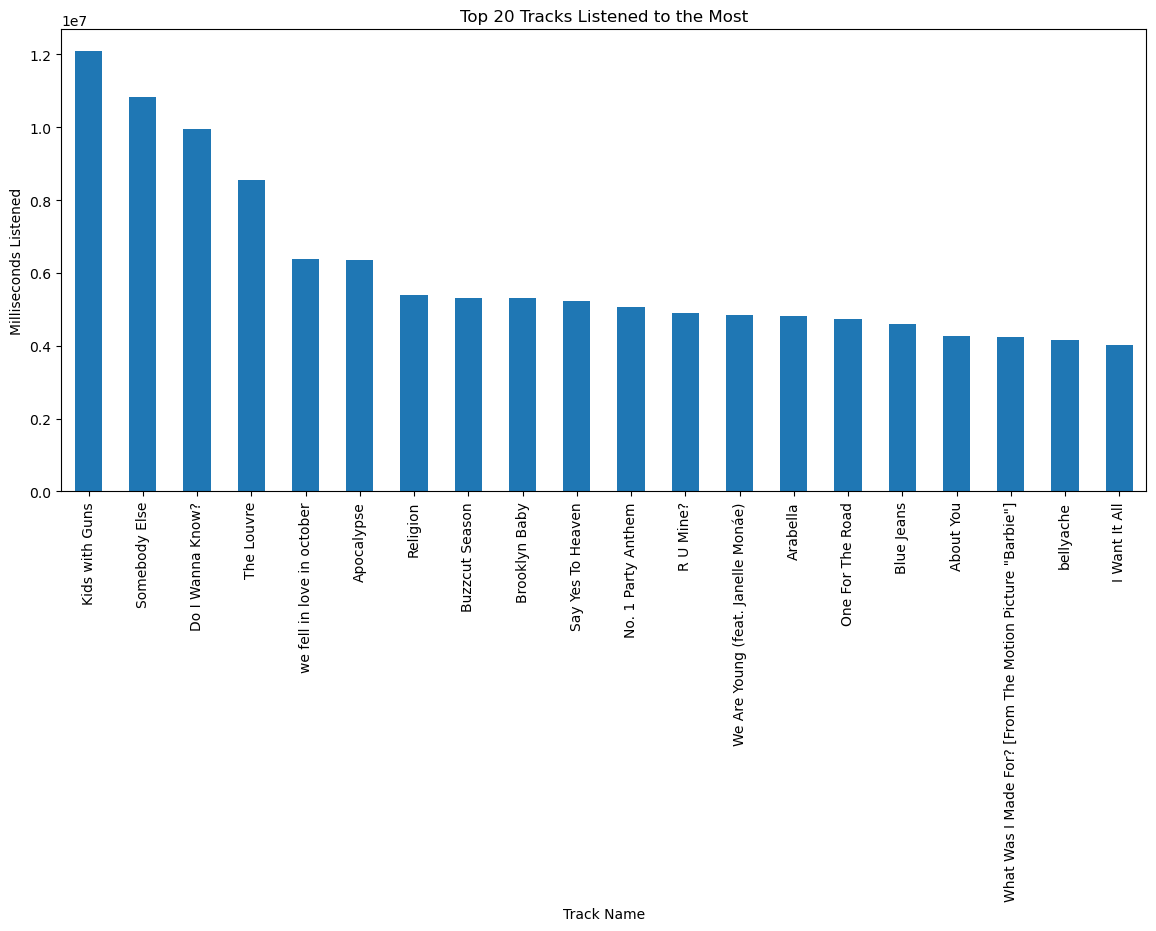

In [93]:
#Most listened to Songs
top_tracks_ms = streaming_music.groupby("trackName")['msPlayed'].sum().sort_values(ascending = False).head(20)

plt.figure(figsize = (14,6))
top_tracks_ms.plot(kind= "bar")
plt.xlabel("Track Name")
plt.ylabel("Milliseconds Listened")
plt.title("Top 20 Tracks Listened to the Most")
plt.show()

In [ ]:
document.querySelector("#application > main > div:nth-child(3) > div.PageGriddesktop-a6v82w-0.SongPageGriddesktop-sc-1px5b71-0.jecoie.About__Grid-ut4i9m-0.iLENbn > div.About__Container-ut4i9m-1.eSiFpi > div.SongDescription__Container-sc-615rvk-0.lbmvpT > div.ExpandableContent__Container-sc-1165iv-0.ikywhQ > div.ExpandableContent__Content-sc-1165iv-4.hUMTwf > div > div")

In [ ]:
document.querySelector("#application > main > div:nth-child(3) > div.PageGriddesktop-a6v82w-0.SongPageGriddesktop-sc-1px5b71-0.jecoie.About__Grid-ut4i9m-0.iLENbn > div.About__Container-ut4i9m-1.eSiFpi > div.ExpandableContent__Container-sc-1165iv-0.ikywhQ > div.ExpandableContent__Content-sc-1165iv-4.hUMTwf > div > div.SongTags__Container-xixwg3-1.bZsZHM")

In [96]:
import requests

CLIENT_ACCESS_TOKEN = "bL0j4LyQP3PB7eFeV14LfFvmFVQAbeXHuYcPF5WPhEJc5UnIK4KqVILGTWI8VI4a"

BASE_URI = "https://api.genius.com"

def _get(path, params=None, headers=None):

    url = '/'.join([BASE_URI, path])

    token = "Bearer {}".format(CLIENT_ACCESS_TOKEN)

    if headers:
        headers['Authorization'] = token
    else:
        headers = {"Authorization": token}

    response = requests.get(url=url, params=params, headers=headers)
    response.raise_for_status()

    return response.json()

def get_artist_songs(artist_id):

    current_page = 1
    next_page = True
    songs = []

    while next_page:

        path = "artists/{}/songs/".format(artist_id)
        params = {'page': current_page}
        data = _get(path=path, params=params)

        page_songs = data['response']['songs']

        if page_songs:
            songs += page_songs
            current_page += 1
        else:
            next_page = False

    return songs

In [97]:
songs = get_artist_songs(958)
songs = [song for song in songs if song['primary_artist']['id'] == 958]

In [106]:
[" ".join(song["full_title"].split()) for song in songs]

['4th of july by Sufjan Stevens',
 'Abraham by Sufjan Stevens',
 'A Conjunction of Drones Simulating the Way in Which Sufjan Stevens Has an Existential Crisis in the Great Godfrey Maze by Sufjan Stevens',
 'Adlai Stevenson by Sufjan Stevens',
 'Age of Adz by Sufjan Stevens',
 'A Good Man Is Hard to Find by Sufjan Stevens',
 'Ah Holy Jesus by Sufjan Stevens',
 'Ah Holy Jesus (A Capella) by Sufjan Stevens',
 'Ah Holy Jesus (with reed organ) by Sufjan Stevens',
 'A Holly Jolly Christmas by Sufjan Stevens',
 'Alanson, Crooked River by Sufjan Stevens',
 'A Little Lost by Sufjan Stevens',
 'All Delighted People (2000 version) by Sufjan Stevens',
 'All Delighted People (Classic Rock Version) by Sufjan Stevens',
 'All Delighted People (Original Version) by Sufjan Stevens',
 'All for Myself by Sufjan Stevens',
 'All Good Naysayers, Speak Up! Or Forever Hold Your Peace! by Sufjan Stevens',
 'All of Me Wants All of You by Sufjan Stevens',
 'All of Me Wants All of You — Helado Negro Remix by Sufja

#### APP WEBSITE URL
https://sanjanasongs.com/

REDIRECT URI

http://localhost:8888/notebooks/

CLIENT ID

fToPQy_46ErHceuwOrztf_IS3PUxZupD9aLTU5O6TEvlUb2VCqq9Ycuke4whVva-

CLIENT SECRET

4C5XnN1c6wGLUWmoElvxogVaDVnbaDcGsoUOolI7MaobqF9I8mkUImrQA-6PPPfsR03hDdvHcVBzB4LTBgbmPw

CLIENT ACCESS TOKEN

bL0j4LyQP3PB7eFeV14LfFvmFVQAbeXHuYcPF5WPhEJc5UnIK4KqVILGTWI8VI4a